In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
data_dir = "climate_timeseries"
data = pd.read_csv(f"{data_dir}/POWER_pandanwangi_formatted.csv")
df_OpenWeather = pd.read_csv(f"{data_dir}/OpenWeather_pandanwangi.csv")

In [38]:
data.columns

Index(['YEAR', 'DOY', 'T2M', 'T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX',
       'T2M_MIN', 'PS', 'WS2M', 'WS2M_MAX', 'WS2M_MIN', 'GWETTOP', 'GWETROOT'],
      dtype='object')

In [43]:
import pandas as pd

df = pd.read_csv(f"{data_dir}/POWER_pandanwangi_formatted.csv")

selected_columns = ['YEAR', 'DOY', 'T2M', 'PS', 'WS2M', 'GWETTOP']
df_power = df[selected_columns]

print("Ringkasan statistik:")
print(df_power.describe())

print("Missing or null values:")
print(df_power.isnull().sum())

Ringkasan statistik:
              YEAR          DOY          T2M           PS         WS2M  \
count  9102.000000  9102.000000  9102.000000  9102.000000  9102.000000   
mean   2011.960448   182.585366    23.234998    94.919133     1.149359   
std       7.190975   105.180917    23.981878    25.647824    23.457548   
min    2000.000000     1.000000  -999.000000  -999.000000  -999.000000   
25%    2006.000000    92.000000    23.260000    95.440000     1.240000   
50%    2012.000000   183.000000    23.800000    95.520000     1.620000   
75%    2018.000000   274.000000    24.370000    95.610000     2.050000   
max    2024.000000   366.000000    26.720000    95.970000     5.770000   

           GWETTOP  
count  9102.000000  
mean    -15.962797  
std     128.544173  
min    -999.000000  
25%       0.770000  
50%       0.870000  
75%       0.920000  
max       0.990000  
Missing or null values:
YEAR       0
DOY        0
T2M        0
PS         0
WS2M       0
GWETTOP    0
dtype: int64


In [44]:
# konversi DATE dan DOY menjadi tipe datetime, masukkan ke kolom 'DATE'
df_power['DATE'] = pd.to_datetime(data['YEAR'].astype(str) + 
                                  data['DOY'].astype(str), 
                                  format='%Y%j')

df_power.set_index('DATE', inplace=True) # set kolom DATE sebagai index terbaru

# fungsi untuk membuang nilai tidak umum atau pencilan (outliers)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# membuang outliers pada setiap fitur
for feature in ['T2M', 'PS', 'WS2M', 'GWETTOP']:
    original_size = len(df_power)
    df_power = remove_outliers(df_power, feature)
    print(f"Removed outliers from {feature}: {original_size - len(df_power)} rows removed")

Removed outliers from T2M: 110 rows removed
Removed outliers from PS: 84 rows removed
Removed outliers from WS2M: 185 rows removed
Removed outliers from GWETTOP: 163 rows removed


/var/folders/23/fhr6pm5x47z58yk0t_wn5y0w0000gn/T/ipykernel_3144/408572773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_power['DATE'] = pd.to_datetime(data['YEAR'].astype(str) +


In [45]:
print("Ringkasan statistik:")
print(df_power.describe())

Ringkasan statistik:
              YEAR          DOY          T2M           PS         WS2M  \
count  8560.000000  8560.000000  8560.000000  8560.000000  8560.000000   
mean   2011.840654   181.882593    23.822607    95.522798     1.649562   
std       7.083141   104.456314     0.806743     0.124071     0.558763   
min    2000.000000     1.000000    21.600000    95.190000     0.360000   
25%    2006.000000    92.750000    23.280000    95.440000     1.230000   
50%    2012.000000   179.000000    23.820000    95.530000     1.590000   
75%    2018.000000   272.000000    24.380000    95.610000     2.020000   
max    2024.000000   366.000000    26.020000    95.860000     3.260000   

           GWETTOP  
count  8560.000000  
mean      0.845093  
std       0.095155  
min       0.550000  
25%       0.770000  
50%       0.880000  
75%       0.920000  
max       0.990000  


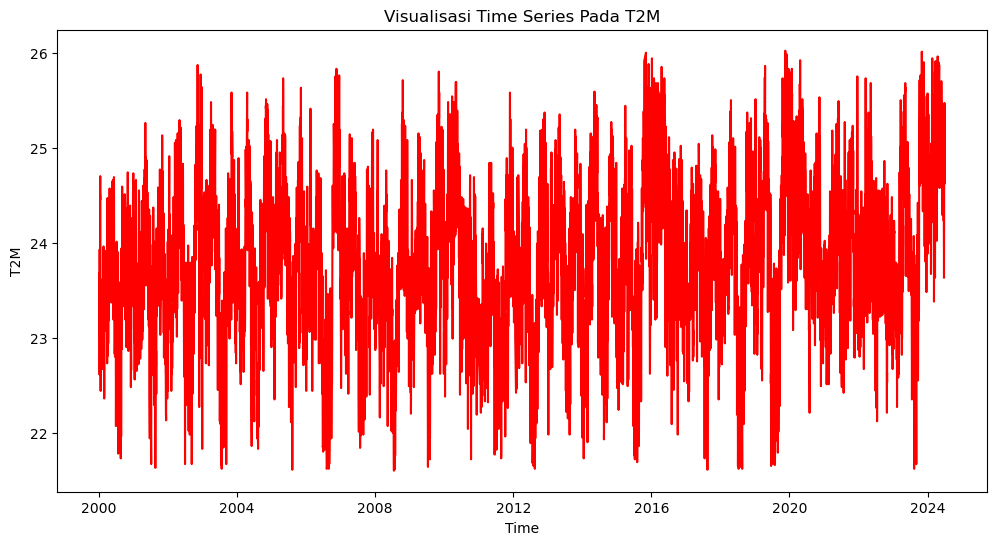

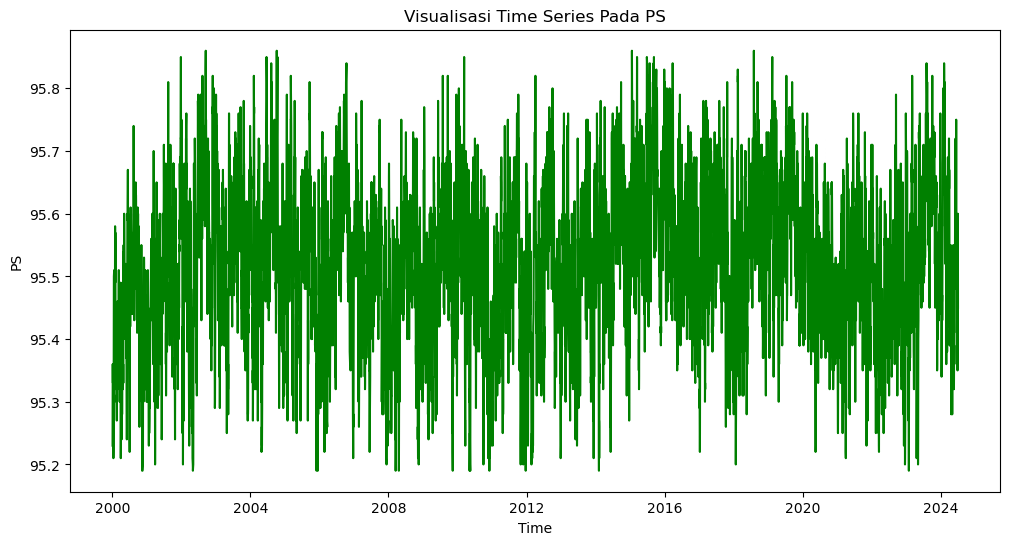

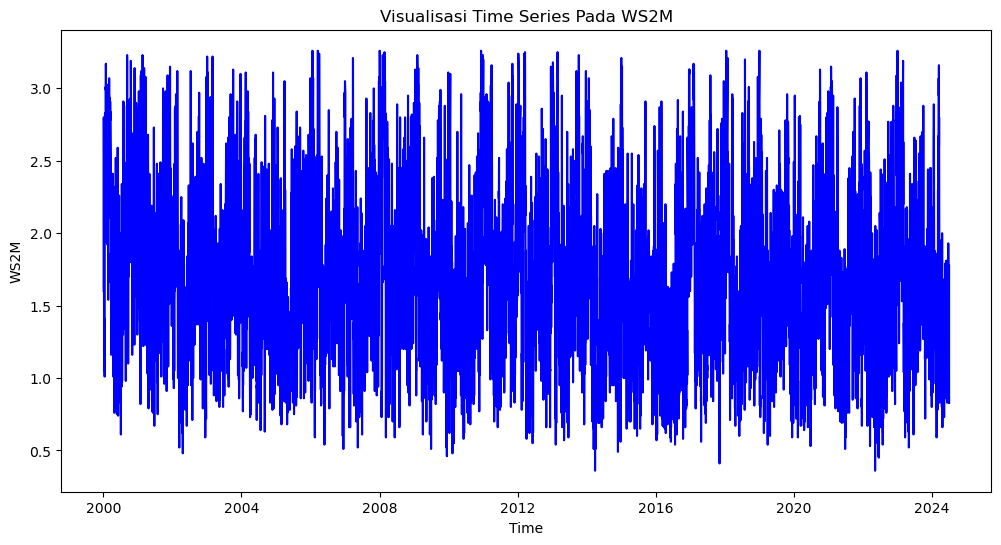

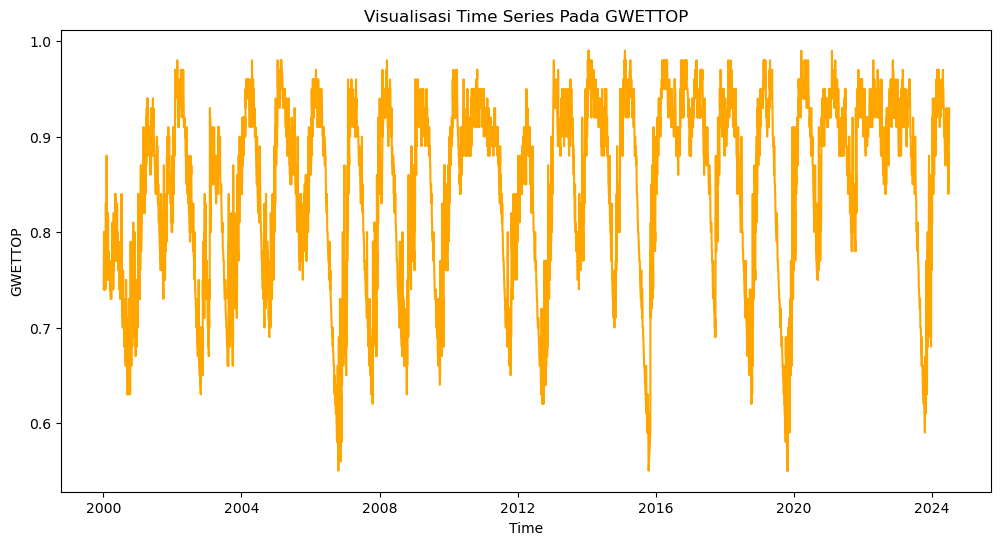

In [49]:
colors = ['red', 'green', 'blue', 'orange']

for idx,feature in enumerate(['T2M', 'PS', 'WS2M', 'GWETTOP']):
    plt.figure(figsize=(12, 6))
    plt.plot(df_power.index, df_power[feature], label=feature, color=colors[idx])
    plt.title(f'Visualisasi Time Series Pada {feature}')
    plt.xlabel('Time')
    plt.ylabel(feature)
    plt.show()



Dataset Head:
   YEAR  DOY    T2M     PS  WS2M  GWETTOP
0  2000    1  24.45  95.15  2.55     0.73
1  2000    2  24.25  95.10  2.95     0.72
2  2000    3  23.49  95.15  2.17     0.74
3  2000    4  23.92  95.23  1.60     0.74
4  2000    5  23.01  95.31  2.80     0.77

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9102 entries, 0 to 9101
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     9102 non-null   int64  
 1   DOY      9102 non-null   int64  
 2   T2M      9102 non-null   float64
 3   PS       9102 non-null   float64
 4   WS2M     9102 non-null   float64
 5   GWETTOP  9102 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 426.8 KB

Summary Statistics:
              YEAR          DOY          T2M           PS         WS2M  \
count  9102.000000  9102.000000  9102.000000  9102.000000  9102.000000   
mean   2011.960448   182.585366    23.234998    94.919133     1.149359   
std       7.1

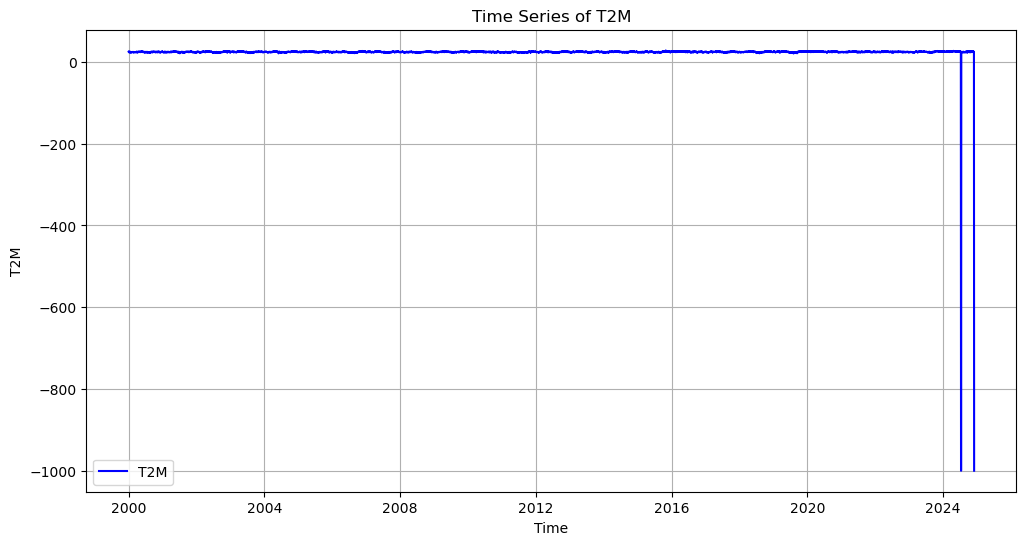

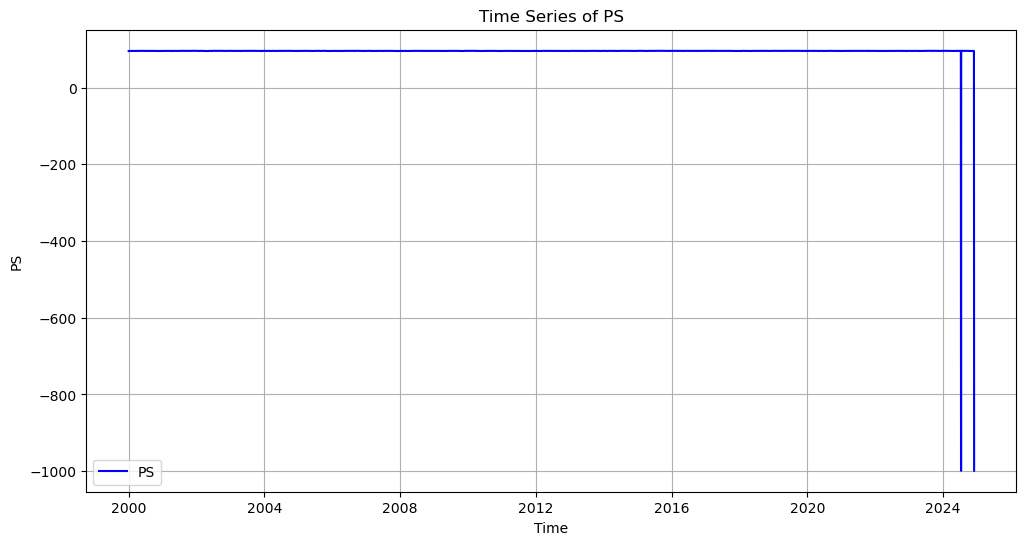

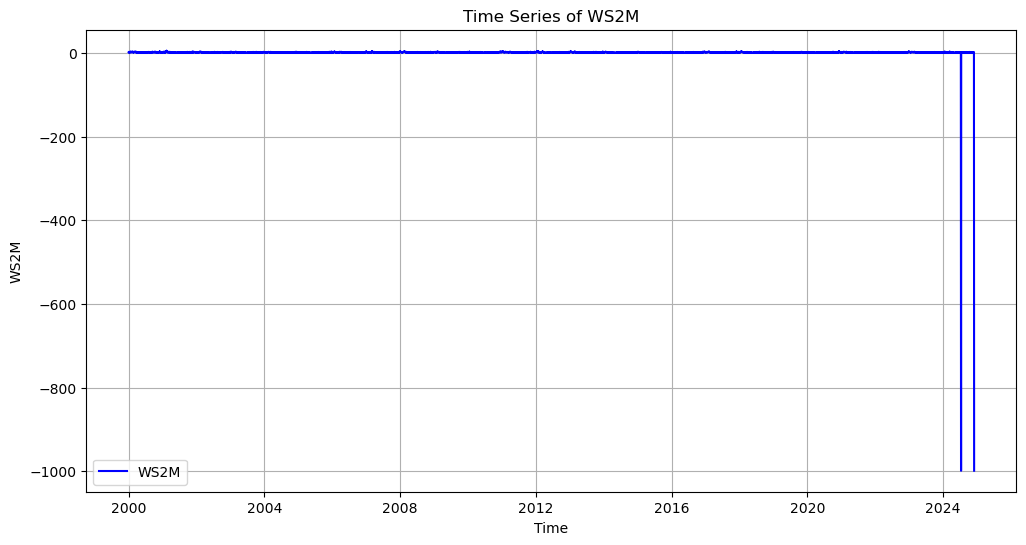

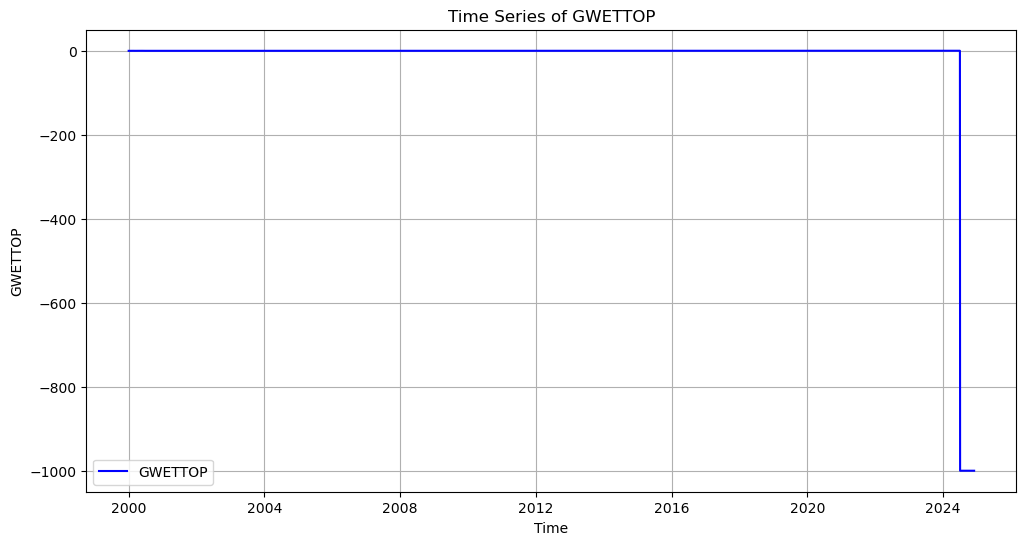

Removed outliers from T2M: 110 rows removed
Removed outliers from PS: 84 rows removed
Removed outliers from WS2M: 185 rows removed
Removed outliers from GWETTOP: 163 rows removed


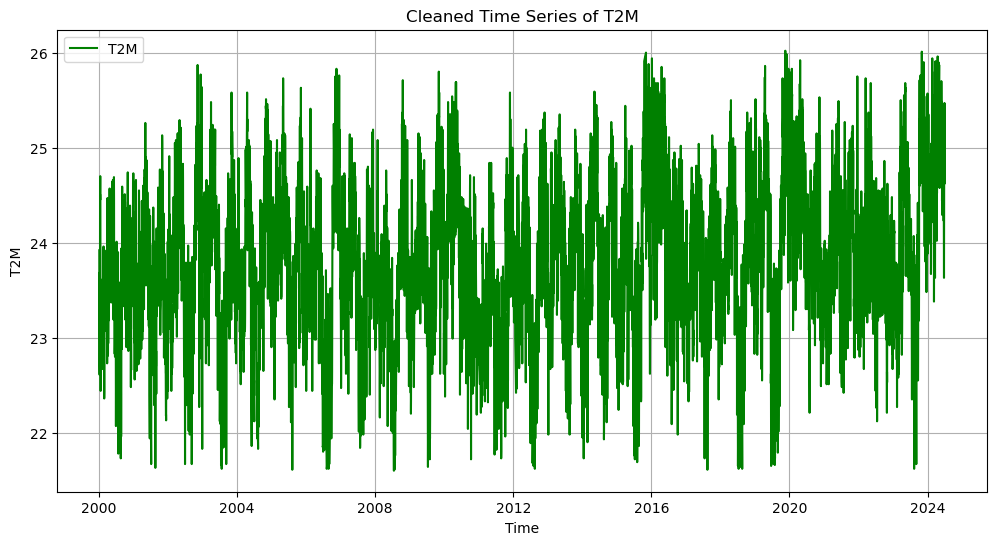

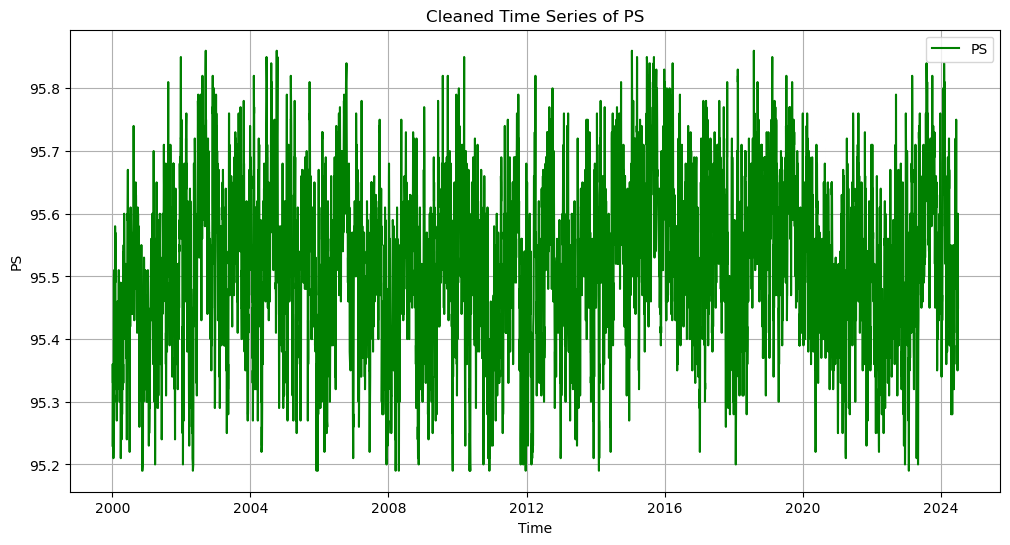

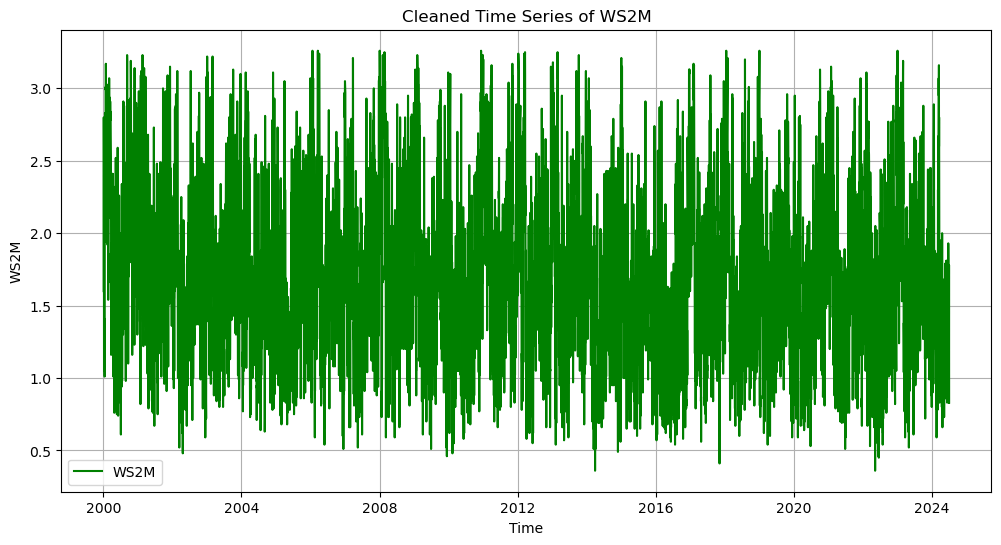

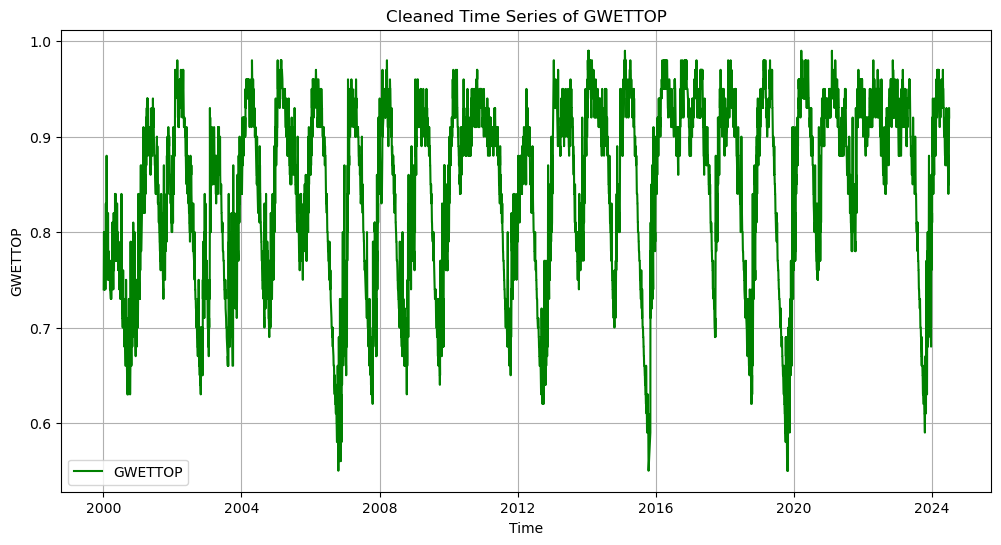

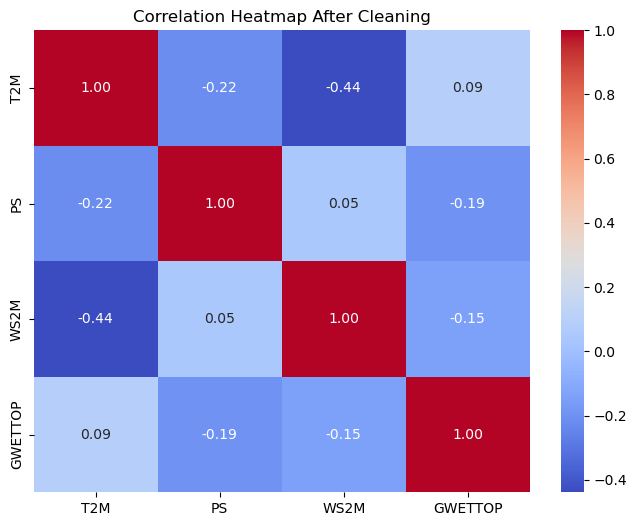

In [31]:
import pandas as pd

df = pd.read_csv(f"{data_dir}/POWER_pandanwangi_formatted.csv")

selected_columns = ['YEAR', 'DOY', 'T2M', 'PS', 'WS2M', 'GWETTOP']
df_power = df[selected_columns]

print("Ringkasan statistik:")
print(df_power.describe())

print("Missing or null values:")
print(df_power.isnull().sum())

# konversi DATE dan DOY menjadi tipe datetime, masukkan ke kolom 'DATE'
df_power['DATE'] = pd.to_datetime(data['YEAR'].
                                  astype(str) + 
                                  data['DOY'].
                                  astype(str), 
                                  format='%Y%j')

df_power.set_index('DATE', inplace=True)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for feature in ['T2M', 'PS', 'WS2M', 'GWETTOP']:
    original_size = len(data)
    data = remove_outliers(data, feature)
    print(f"Removed outliers from {feature}: {original_size - len(data)} rows removed")
    
# Line graphs for time series analysis
for feature in ['T2M', 'PS', 'WS2M', 'GWETTOP']:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[feature], label=feature, color='blue')
    plt.title(f'Time Series of {feature}')
    plt.xlabel('Time')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()

# Detecting and cleaning outliers using the IQR method

# Re-plot the cleaned data for time series
for feature in ['T2M', 'PS', 'WS2M', 'GWETTOP']:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[feature], label=feature, color='green')
    plt.title(f'Cleaned Time Series of {feature}')
    plt.xlabel('Time')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Correlation heatmap for selected variables after cleaning
plt.figure(figsize=(8, 6))
corr_matrix = data[['T2M', 'PS', 'WS2M', 'GWETTOP']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap After Cleaning')
plt.show()



Dataset Head:
   YEAR  DOY    T2M  T2MDEW  T2MWET     TS  T2M_RANGE  T2M_MAX  T2M_MIN  \
0  2000    1  24.45   21.55   23.00  25.22       7.16    28.80    21.64   
1  2000    2  24.25   21.82   23.03  24.98       6.25    28.10    21.85   
2  2000    3  23.49   21.65   22.58  24.01       5.07    26.73    21.66   
3  2000    4  23.92   21.64   22.78  24.63       6.88    28.18    21.30   
4  2000    5  23.01   21.80   22.40  23.24       3.34    24.98    21.63   

      PS  WS2M  WS2M_MAX  WS2M_MIN  GWETTOP  GWETROOT       DATE  MONTH  
0  95.15  2.55      3.65      1.37     0.73      0.71 2000-01-01      1  
1  95.10  2.95      3.95      1.70     0.72      0.70 2000-01-02      1  
2  95.15  2.17      3.04      1.19     0.74      0.70 2000-01-03      1  
3  95.23  1.60      2.28      0.64     0.74      0.70 2000-01-04      1  
4  95.31  2.80      4.08      1.95     0.77      0.72 2000-01-05      1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9102 entries, 0 to 9101
D

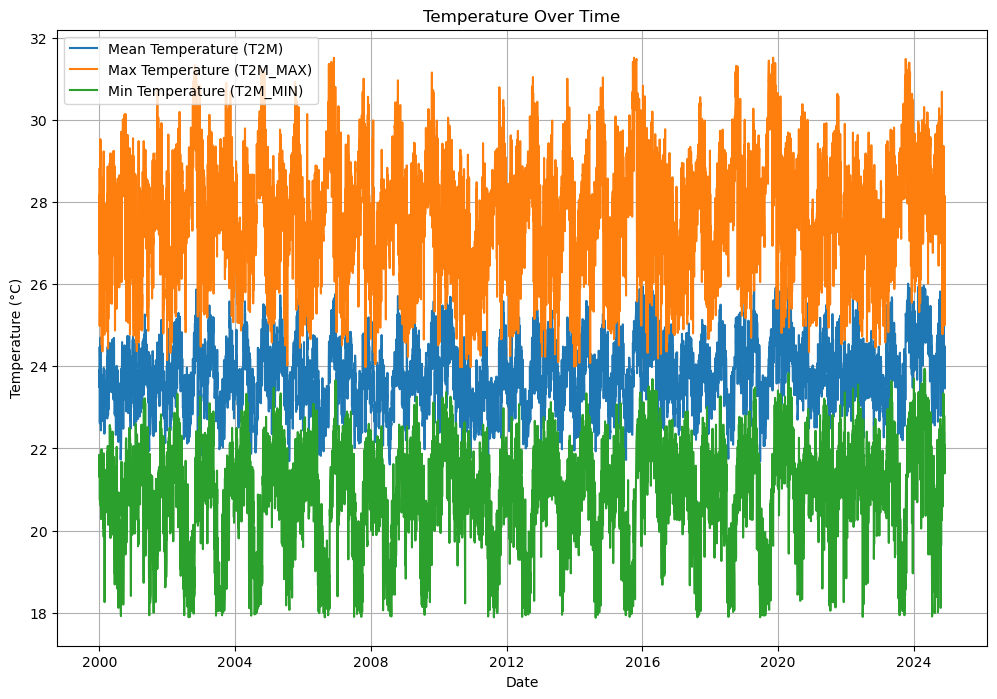

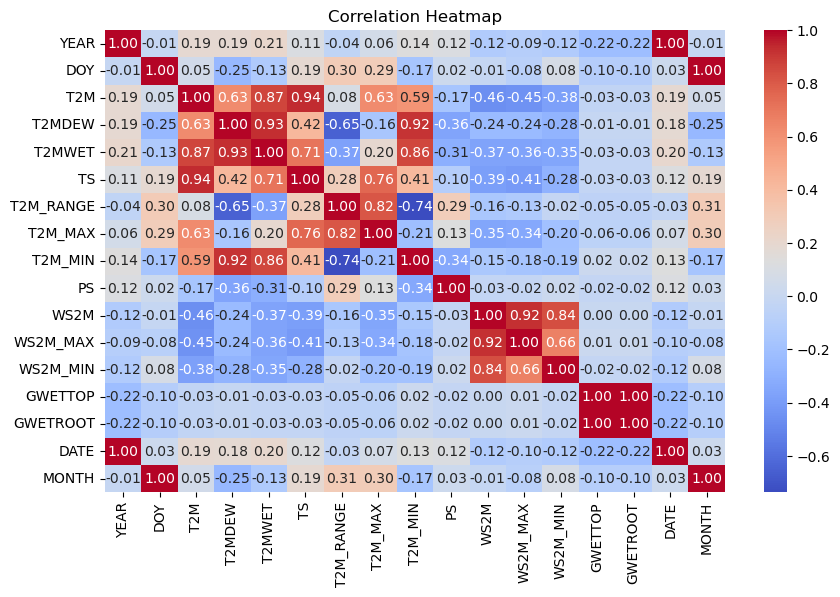

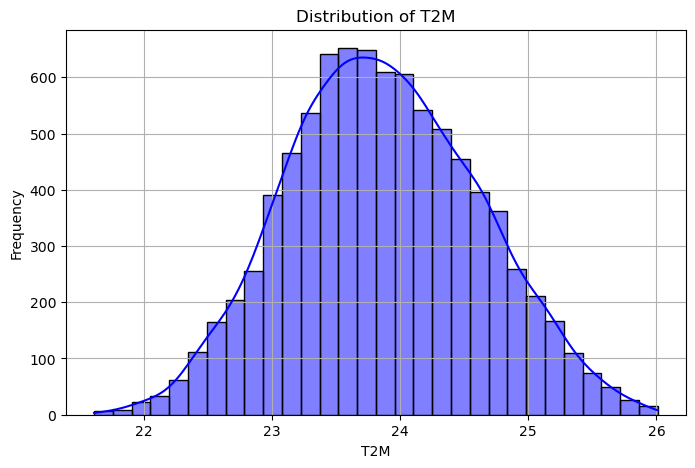

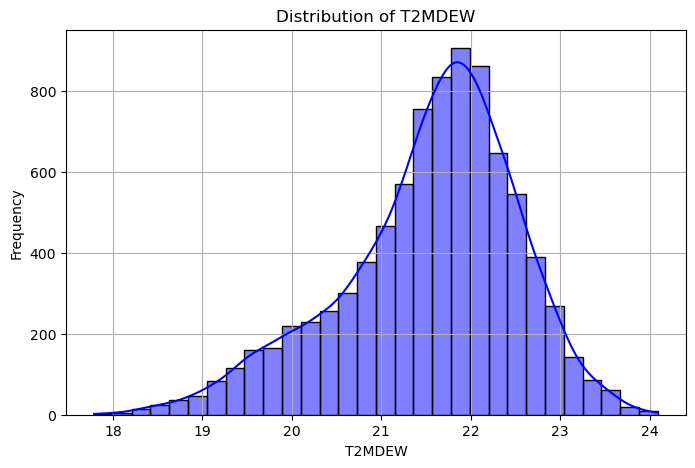

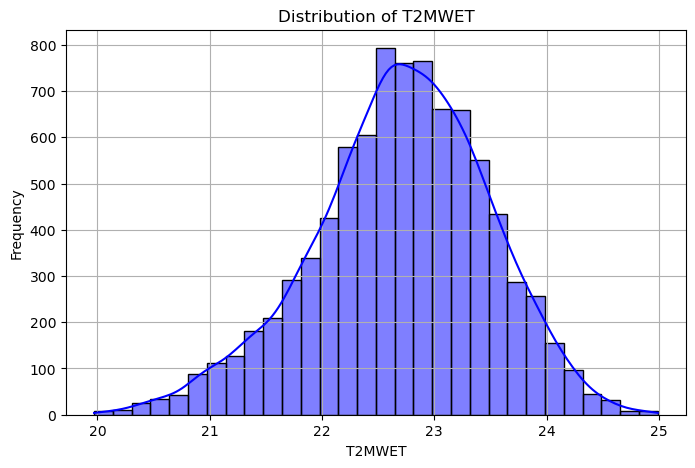

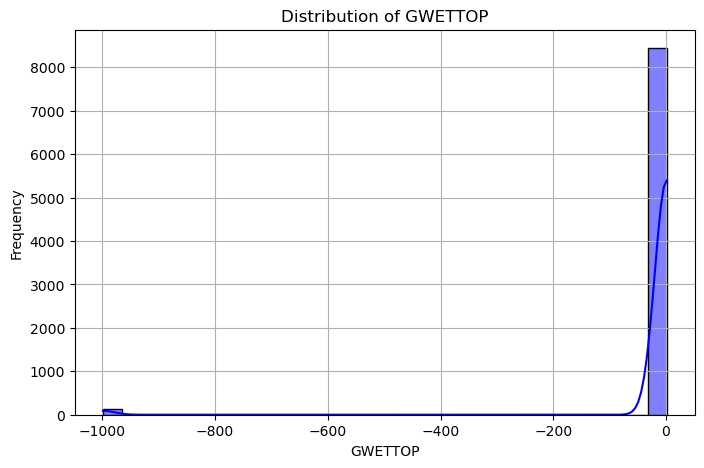

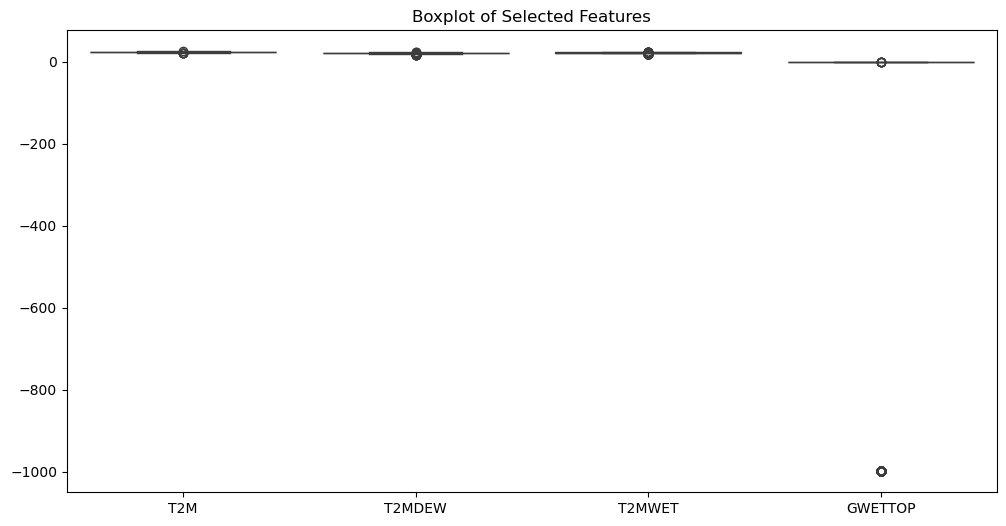

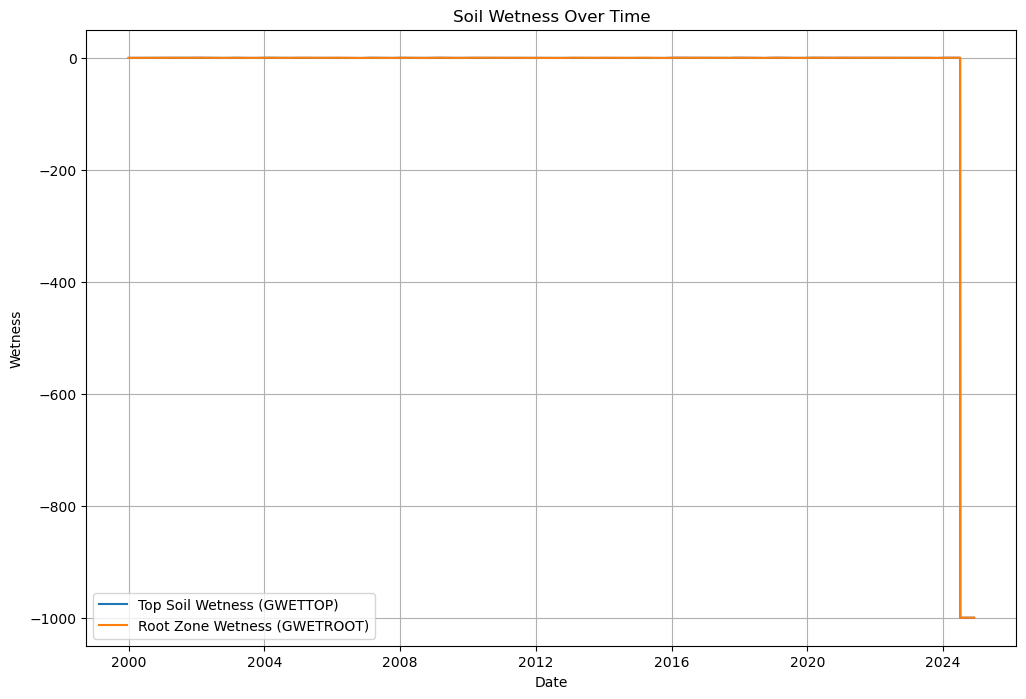

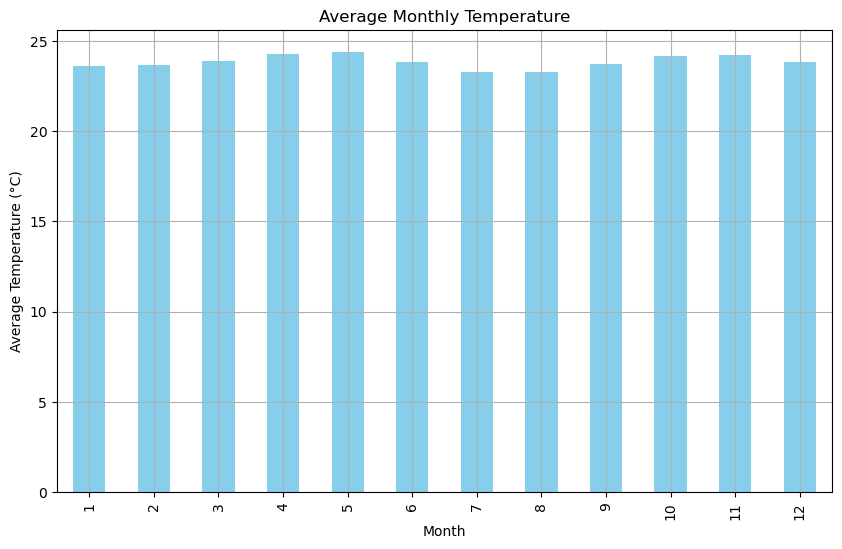

In [8]:
# Quick overview of the dataset
print("\nDataset Head:")
print(data.head())

print("\nDataset Info:")
data.info()

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Remove outliers for temperature features using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from temperature columns
data = remove_outliers_iqr(data, 'T2M')
data = remove_outliers_iqr(data, 'T2M_MAX')
data = remove_outliers_iqr(data, 'T2M_MIN')

# Convert DOY (Day of Year) to datetime for better analysis if YEAR is present
data['DATE'] = pd.to_datetime(data['YEAR'].astype(str) + data['DOY'].astype(str), format='%Y%j')

# Time-series plot for temperature features
plt.figure(figsize=(12, 8))
plt.plot(data['DATE'], data['T2M'], label='Mean Temperature (T2M)')
# plt.plot(data['DATE'], data['T2M_MAX'], label='Max Temperature (T2M_MAX)')
# plt.plot(data['DATE'], data['T2M_MIN'], label='Min Temperature (T2M_MIN)')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution plots for key features
features_to_plot = ['T2M', 'T2MDEW', 'T2MWET', 'GWETTOP']
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# Boxplot to detect outliers in selected columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['T2M', 'T2MDEW', 'T2MWET', 'GWETTOP']])
plt.title('Boxplot of Selected Features')
plt.show()

# Trends for ground wetness features
plt.figure(figsize=(12, 8))
plt.plot(data['DATE'], data['GWETTOP'], label='Top Soil Wetness (GWETTOP)')
plt.plot(data['DATE'], data['GWETROOT'], label='Root Zone Wetness (GWETROOT)')
plt.title('Soil Wetness Over Time')
plt.xlabel('Date')
plt.ylabel('Wetness')
plt.legend()
plt.grid()
plt.show()

# Seasonality detection: Monthly average temperature
if 'DATE' in data.columns:
    data['MONTH'] = data['DATE'].dt.month
    monthly_avg_temp = data.groupby('MONTH')['T2M'].mean()
    plt.figure(figsize=(10, 6))
    monthly_avg_temp.plot(kind='bar', color='skyblue')
    plt.title('Average Monthly Temperature')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (°C)')
    plt.grid()
    plt.show()
